In [1]:
# Description: Plot spectral properties of upstates and downstates in ECoG data and save figures. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import logging
from pathlib import Path
import matplotlib.patches as mpatches
from fooof.sim import gen_freqs
from scipy.stats import mannwhitneyu

# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)
exp_name = file_path.split('/')[-1]

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info(f"Current file directory: {file_path}")
logging.info(f"Current project directory: {project_path}")

os.chdir(project_path)
sys.path.append(project_path)

2023-08-06 19:29:56,289 - INFO - Current file directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/spectral-analysis
2023-08-06 19:29:56,289 - INFO - Current project directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves


In [2]:
ecog_w12_18 = np.load('data/processed/w12_18.spont/Probe1_lfps_spont.npy')
probe1_w12_18 = np.load('data/processed/w12_18.spont/Probe2_lfps_spont.npy')
probe2_w12_18 = np.load('data/processed/w12_18.spont/Probe3_lfps_spont.npy')
times_w12_18 = np.load('data/processed/w12_18.spont/times.npy')
event_times_w12_18 = np.load('data/processed/w12_18.spont/event_times.npy')

ecog_w12_07 = np.load('data/processed/w12_07.spont/Probe1_lfps_spont.npy')
probe1_w12_07 = np.load('data/processed/w12_07.spont/Probe2_lfps_spont.npy')
probe2_w12_07 = np.load('data/processed/w12_07.spont/Probe3_lfps_spont.npy')
times_w12_07 = np.load('data/processed/w12_07.spont/times.npy')
event_times_w12_07 = np.load('data/processed/w12_07.spont/event_times.npy')

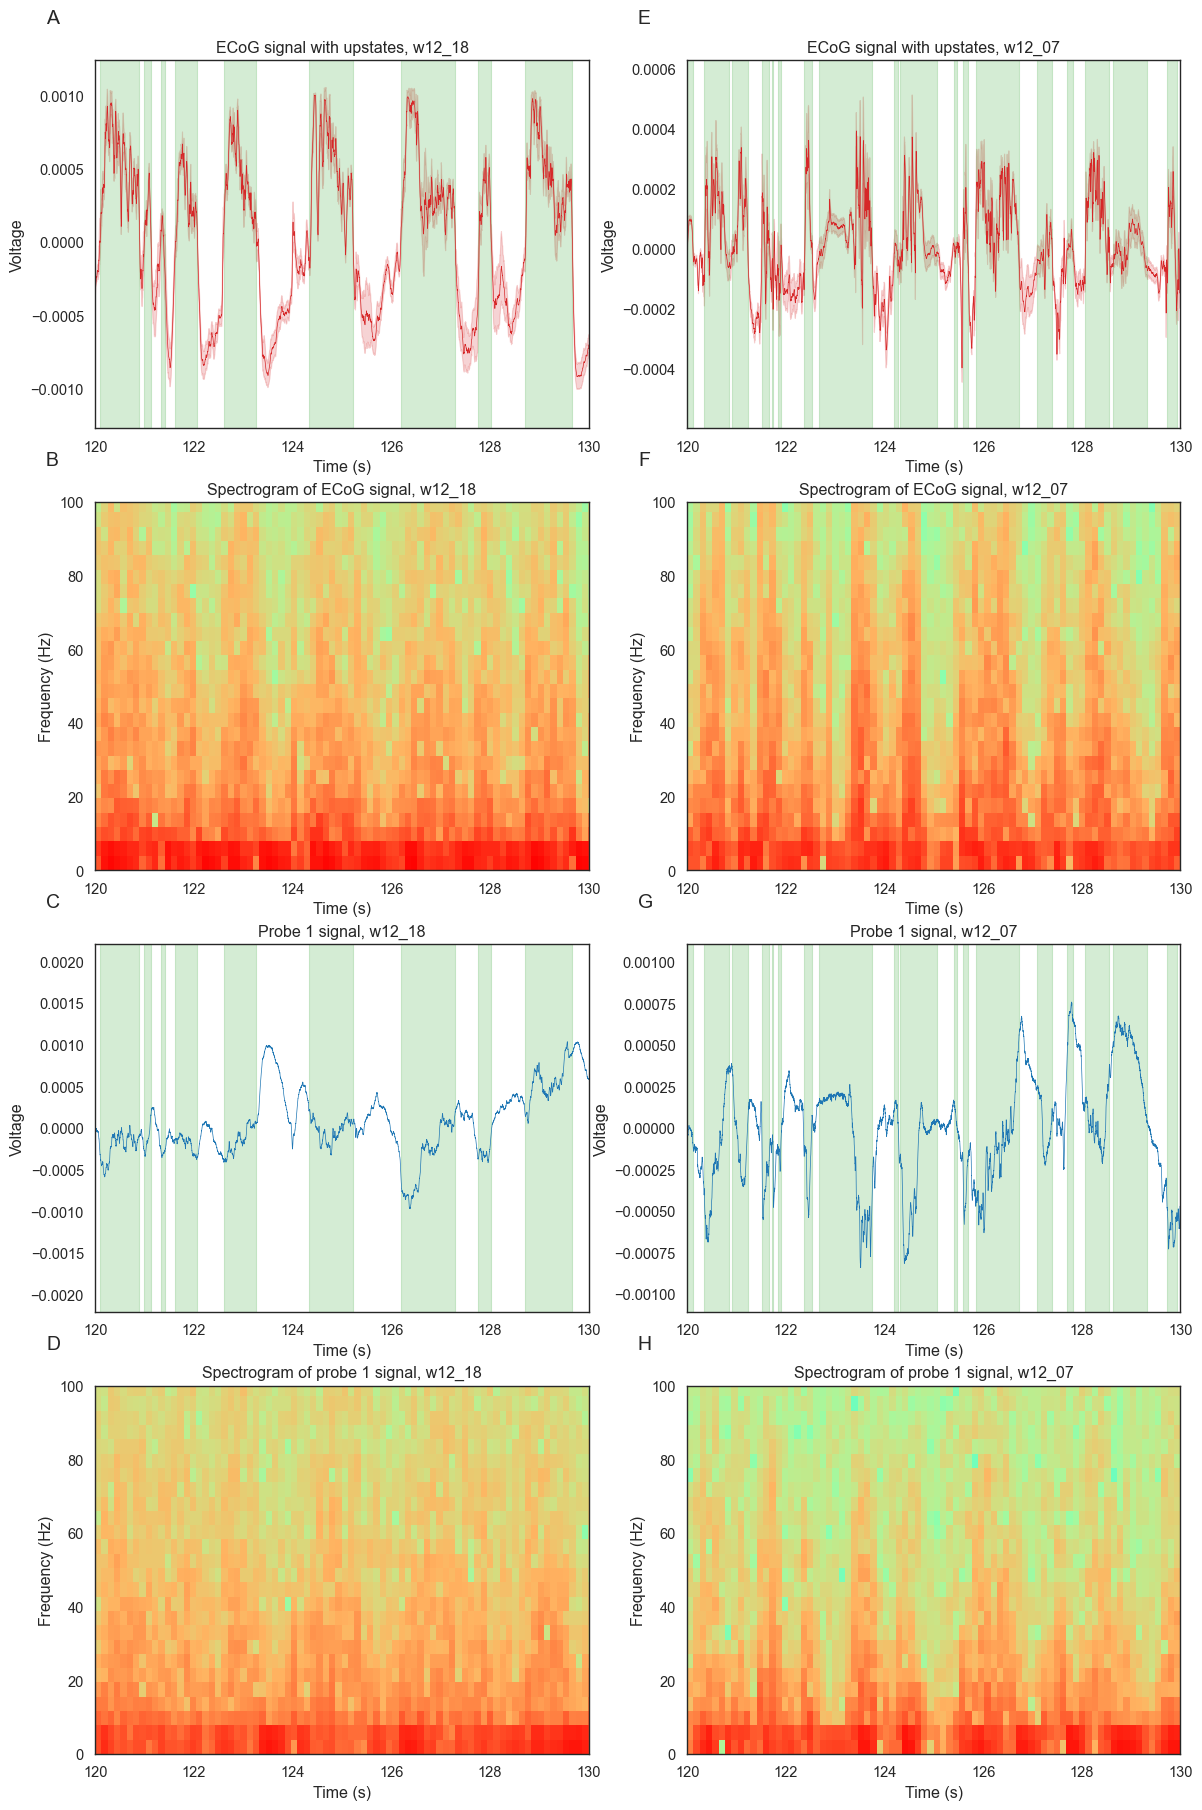

In [10]:
from matplotlib.gridspec import GridSpec

# Set plotting style
sns.set_context('paper', font_scale=1.2, rc={'lines.linewidth': 2})
sns.set_palette('colorblind')
sns.set_style('white')

# Set color palette and style
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sns.set_palette(color_palette)


# Set GridSpec for the figure
fig = plt.figure(figsize=(14, 22))
gs = GridSpec(4, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) # ecog raw signal with upstates exp 18
ax2 = fig.add_subplot(gs[1, 0]) # ecog spectrogram exp 18
ax3 = fig.add_subplot(gs[2, 0]) # probe 1 raw signal with upstates exp 18
ax4 = fig.add_subplot(gs[3, 0]) # probe 1 spectrogram exp 18

ax5 = fig.add_subplot(gs[0, 1]) # ecog raw signal with upstates exp 07
ax6 = fig.add_subplot(gs[1, 1]) # ecog spectrogram exp 07
ax7 = fig.add_subplot(gs[2, 1]) # probe 1 raw signal with upstates exp 07
ax8 = fig.add_subplot(gs[3, 1]) # probe 1 spectrogram exp 07

ax1.plot(times_w12_18, ecog_w12_18.mean(axis=0), linewidth=0.5, color = 'tab:red')
# add std as shaded area
ax1.fill_between(times_w12_18, ecog_w12_18.mean(axis=0) - ecog_w12_18.std(axis=0),
                ecog_w12_18.mean(axis=0) + ecog_w12_18.std(axis=0), alpha=0.2, color='tab:red')
# add upstates as spanned area
for i in range(len(event_times_w12_18)):
    ax1.axvspan(event_times_w12_18[i][0], event_times_w12_18[i][1], color='tab:green', alpha=0.2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage')
ax1.set_title('ECoG signal with upstates, w12_18')
ax1.set_xlim(120, 130)


# add spectrogram in a given time window
ax2.specgram(ecog_w12_18.mean(axis=0), Fs=1000, NFFT=256, noverlap=128, cmap='rainbow')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Spectrogram of ECoG signal, w12_18')
ax2.set_xlim(120, 130)
ax2.set_ylim(0, 100)

# add last channel of probe 1 signal
ax3.plot(times_w12_18, probe1_w12_18[-1], linewidth=0.5, color='tab:blue')
# add upstates as spanned area
for i in range(len(event_times_w12_18)):
    ax3.axvspan(event_times_w12_18[i][0], event_times_w12_18[i][1], color='tab:green', alpha=0.2)

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Voltage')
ax3.set_title('Probe 1 signal, w12_18')
ax3.set_xlim(120, 130)

# add spectrogram in a given time window
ax4.specgram(probe1_w12_18[-1], Fs=1000, NFFT=256, noverlap=128, cmap='rainbow')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_title('Spectrogram of probe 1 signal, w12_18')
ax4.set_xlim(120, 130)
ax4.set_ylim(0, 100)


# Plot mean ecog signal ovetlaid with upstates
ax5.plot(times_w12_07, ecog_w12_07.mean(axis=0), linewidth=0.5, color='tab:red')
# add std as shaded area
ax5.fill_between(times_w12_07, ecog_w12_07.mean(axis=0) - ecog_w12_07.std(axis=0),
                ecog_w12_07.mean(axis=0) + ecog_w12_07.std(axis=0), alpha=0.2, color='tab:red')
# add upstates as spanned area
for i in range(len(event_times_w12_07)):
    ax5.axvspan(event_times_w12_07[i][0], event_times_w12_07[i][1], color='tab:green', alpha=0.2)
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Voltage')
ax5.set_title('ECoG signal with upstates, w12_07')
ax5.set_xlim(120, 130)


# add spectrogram in a given time window
ax6.specgram(ecog_w12_07.mean(axis=0), Fs=1000, NFFT=256, noverlap=128, cmap='rainbow')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Frequency (Hz)')
ax6.set_title('Spectrogram of ECoG signal, w12_07')
ax6.set_xlim(120, 130)
ax6.set_ylim(0, 100)

# add last channel of probe 1 signal
ax7.plot(times_w12_07, probe1_w12_07[-1], linewidth=0.5, color='tab:blue')
# add upstates as spanned area
for i in range(len(event_times_w12_07)):
    ax7.axvspan(event_times_w12_07[i][0], event_times_w12_07[i][1], color='tab:green', alpha=0.2)

ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Voltage')
ax7.set_title('Probe 1 signal, w12_07')
ax7.set_xlim(120, 130)

# add spectrogram in a given time window
ax8.specgram(probe1_w12_07[-1], Fs=1000, NFFT=256, noverlap=128, cmap='rainbow')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Frequency (Hz)')
ax8.set_title('Spectrogram of probe 1 signal, w12_07')
ax8.set_xlim(120, 130)
ax8.set_ylim(0, 100)

# Also add letters to the subplots 
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, size=14)
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, size=14)
ax3.text(-0.1, 1.1, 'C', transform=ax3.transAxes, size=14)
ax4.text(-0.1, 1.1, 'D', transform=ax4.transAxes, size=14)
ax5.text(-0.1, 1.1, 'E', transform=ax5.transAxes, size=14)
ax6.text(-0.1, 1.1, 'F', transform=ax6.transAxes, size=14)
ax7.text(-0.1, 1.1, 'G', transform=ax7.transAxes, size=14)
ax8.text(-0.1, 1.1, 'H', transform=ax8.transAxes, size=14)


# save figure
fig.savefig(f'{project_path}/res/{exp_name}/spectrograms.png', dpi=300, bbox_inches='tight')